# Netflix 이탈 데이터 불러오기

In [1]:
# train/test파일 읽기
import pandas as pd

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [2]:
# csv 파일 읽기
train_df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned
0,5b9fc53d-960a-475a-b189-b54d9c7564a6,35,Female,Premium,8.44,47,Asia,Laptop,17.99,Crypto,4,0.18,Sci-Fi,1
1,44c431b4-0f1a-4403-b701-98ab0f23f260,70,Other,Standard,4.75,54,Europe,Mobile,13.99,Gift Card,3,0.09,Romance,1
2,5bdfbdcf-ab7b-41da-b1d5-51f819eb66dc,52,Female,Basic,22.21,54,Oceania,TV,8.99,Credit Card,1,0.40,Romance,1
3,a6439c47-77e6-4c51-b834-0f66b0f1a239,48,Female,Premium,9.65,60,Oceania,Laptop,17.99,Gift Card,4,0.16,Drama,1
4,9ab55bb5-1957-46a6-8472-d26b2fda624a,47,Other,Basic,13.22,8,North America,Mobile,8.99,Crypto,4,1.47,Action,0


# 전처리 작업

In [3]:
# 필요없는 컬럼제거: customer_id
train_df = train_df.drop(columns=['customer_id'], axis=1)
train_df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned
0,35,Female,Premium,8.44,47,Asia,Laptop,17.99,Crypto,4,0.18,Sci-Fi,1
1,70,Other,Standard,4.75,54,Europe,Mobile,13.99,Gift Card,3,0.09,Romance,1
2,52,Female,Basic,22.21,54,Oceania,TV,8.99,Credit Card,1,0.40,Romance,1
3,48,Female,Premium,9.65,60,Oceania,Laptop,17.99,Gift Card,4,0.16,Drama,1
4,47,Other,Basic,13.22,8,North America,Mobile,8.99,Crypto,4,1.47,Action,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,64,Male,Premium,2.66,57,North America,Desktop,17.99,Credit Card,2,0.05,Romance,1
3496,20,Male,Basic,16.96,53,North America,Tablet,8.99,Gift Card,1,0.31,Action,1
3497,32,Female,Standard,52.67,34,Asia,Laptop,13.99,Gift Card,3,1.50,Sci-Fi,0
3498,67,Other,Standard,10.24,11,South America,Desktop,13.99,Debit Card,2,0.85,Romance,0


In [4]:
# target과 나머지 features로 분류
target = train_df['churned']
features = train_df.drop(columns=['churned'], axis=1)
features.shape

(3500, 12)

In [5]:
target.shape

(3500,)

In [6]:
# target 데이터의 0과 1의 개수 파악
target.value_counts()

churned
1    1761
0    1739
Name: count, dtype: int64

In [7]:
# 필요없는 컬럼제거: customer_id
test_df = test_df.drop(columns=['customer_id'], axis=1)
test_df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned
0,30,Male,Standard,1.65,58,Europe,Mobile,13.99,Crypto,5,0.03,Horror,1
1,67,Female,Premium,0.61,12,Oceania,Tablet,17.99,Crypto,3,0.05,Documentary,1
2,31,Male,Basic,11.96,6,Africa,Laptop,8.99,PayPal,4,1.71,Sci-Fi,0
3,43,Male,Premium,0.05,33,Europe,Tablet,17.99,Debit Card,4,0.00,Sci-Fi,1
4,69,Female,Basic,0.64,21,South America,Mobile,8.99,PayPal,1,0.03,Drama,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,24,Female,Standard,4.10,21,Europe,Mobile,13.99,Credit Card,5,0.19,Romance,0
1496,40,Other,Basic,14.01,14,Europe,Laptop,8.99,Debit Card,3,0.93,Romance,0
1497,68,Male,Basic,24.34,16,Oceania,Desktop,8.99,Credit Card,5,1.43,Documentary,0
1498,67,Male,Basic,7.17,41,Europe,TV,8.99,Crypto,4,0.17,Comedy,1


In [8]:
# target과 features에 대해서 train_test_split 진행
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2800, 12), (700, 12), (2800,), (700,))

In [9]:
# X_train 정보확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2800 entries, 162 to 3174
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2800 non-null   int64  
 1   gender                  2800 non-null   object 
 2   subscription_type       2800 non-null   object 
 3   watch_hours             2800 non-null   float64
 4   last_login_days         2800 non-null   int64  
 5   region                  2800 non-null   object 
 6   device                  2800 non-null   object 
 7   monthly_fee             2800 non-null   float64
 8   payment_method          2800 non-null   object 
 9   number_of_profiles      2800 non-null   int64  
 10  avg_watch_time_per_day  2800 non-null   float64
 11  favorite_genre          2800 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 284.4+ KB


In [10]:
# X_test 정보확인
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 1650 to 2213
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     700 non-null    int64  
 1   gender                  700 non-null    object 
 2   subscription_type       700 non-null    object 
 3   watch_hours             700 non-null    float64
 4   last_login_days         700 non-null    int64  
 5   region                  700 non-null    object 
 6   device                  700 non-null    object 
 7   monthly_fee             700 non-null    float64
 8   payment_method          700 non-null    object 
 9   number_of_profiles      700 non-null    int64  
 10  avg_watch_time_per_day  700 non-null    float64
 11  favorite_genre          700 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 71.1+ KB


# featuring을 위한 수치형 데이터에 대한 heatmap

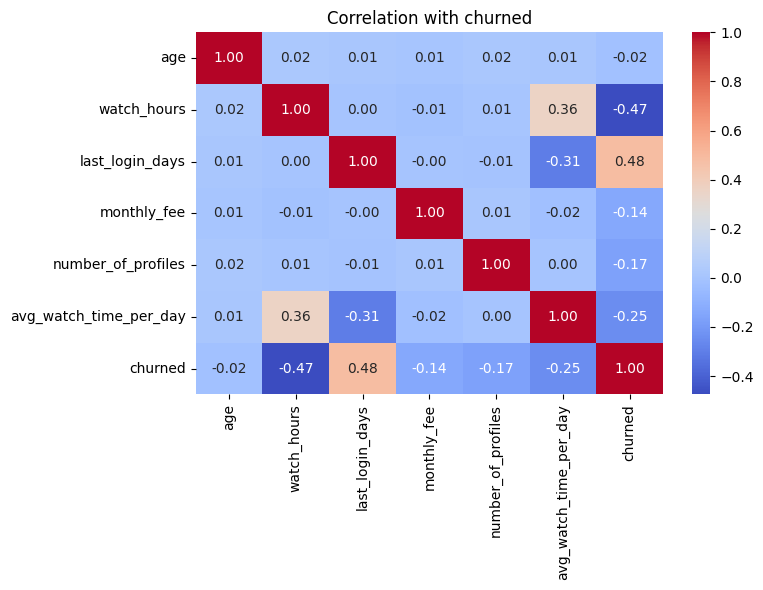

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.concat([X_train, y_train], axis=1)
# 수치형 데이터에 대한 heatmap 상관관계 분석
numeric_cols = train_data.select_dtypes(include=['float64', 'int64'])

# 상관관계 계산
corr = numeric_cols.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with churned')
try:
    plt.tight_layout()
    plt.show()
except:
    import os
    os.mkdir("./images")
    plt.tight_layout()
    plt.show()

- watch_hours와 last_login_days가 이탈(churned)에 중요 feature
- 여기에서 중점은 위의 두개의 features를 pivot으로 하고, 각 문자열(type: object) 데이터와 featuring 진행
- 수치형 데이터를 category로 변환(예: watch_hours => 5미만, 5이상 10미만 ...)
- 진행예시: gender(성별)별 watch_hours(시청시간), subscription_type(구독방식)별 last_login_days(마지막 로그인 경과일)

# 수치형 데이터를 category 형식으로 변경

## watch_hours

In [12]:
# train의 watch_hours 최솟값, 중앙값, 평균값, 최댓값 설정
watch_hours_train = X_train['watch_hours']
watch_hours_train.min(), watch_hours_train.median(), watch_hours_train.mean(), watch_hours_train.max()

(np.float64(0.01), np.float64(8.18), np.float64(11.5527), np.float64(101.06))

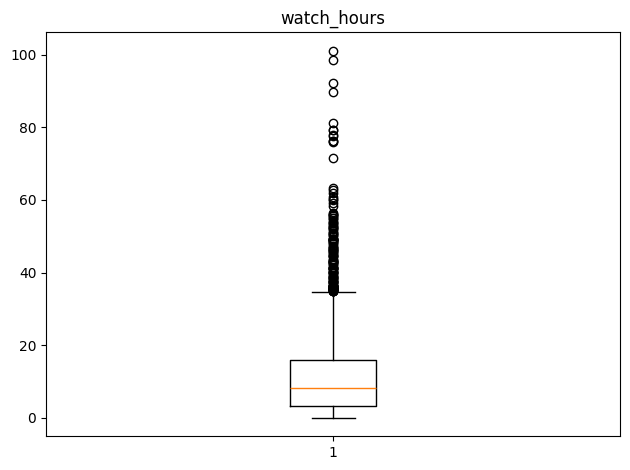

In [13]:
# watch_hours_train의 boxplot
plt.boxplot(watch_hours_train)
try:
    plt.title("watch_hours")
    plt.tight_layout()
    plt.savefig("./images/watch_hours_boxplot")
    plt.show()
except:
    import os
    os.mkdir("./images")
    plt.title("watch_hours")
    plt.tight_layout()
    plt.savefig("./images/watch_hours_boxplot")
    plt.show()

### featuring 방안
- 0: X < watch_hours_train.median() => train데이터의 시청시간 중앙값 미만
- 1: watch_hours_train.median() <= X < 20
- 2: 20 <= X < 40
- 3: X >= 40
- median()과 같은 통계값은 train 데이터로만 진행해야함

In [14]:
# watch_hours featuring
def watch_hours_feature(data, watch_hours):
    result = 3
    if data < 40:
        result = 2
    if data < 20:
        result = 1
    if data < watch_hours.median():
        result = 0

    return result

X_train['watch_hours_feature'] = X_train['watch_hours'].apply(lambda x: watch_hours_feature(x, watch_hours_train))
X_test['watch_hours_feature'] = X_test['watch_hours'].apply(lambda x: watch_hours_feature(x, watch_hours_train))
test_df['watch_hours_feature'] = test_df['watch_hours'].apply(lambda x: watch_hours_feature(x, watch_hours_train))

In [15]:
# test로 쪼갠 test_df에서는 정답 target 데이터인 churned가 포함되어 있음
X_train.shape, X_test.shape, test_df.shape

((2800, 13), (700, 13), (1500, 14))

In [16]:
X_train

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_feature
162,49,Other,Premium,0.21,26,Oceania,TV,17.99,Debit Card,3,0.01,Documentary,0
1001,56,Other,Standard,1.95,28,North America,Mobile,13.99,Crypto,4,0.07,Romance,0
1718,62,Male,Standard,3.58,15,Oceania,Tablet,13.99,Credit Card,5,0.22,Horror,0
1003,52,Female,Basic,20.80,33,Europe,TV,8.99,Credit Card,2,0.61,Romance,2
1233,70,Male,Premium,5.62,25,Europe,Desktop,17.99,Credit Card,3,0.22,Comedy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,Other,Standard,0.68,35,North America,Desktop,13.99,Debit Card,1,0.02,Comedy,0
1130,64,Other,Premium,23.36,52,North America,Mobile,17.99,Debit Card,4,0.44,Drama,2
1294,32,Female,Basic,8.94,6,North America,Desktop,8.99,Crypto,5,1.28,Action,1
860,51,Other,Standard,16.03,48,Africa,Tablet,13.99,Crypto,4,0.33,Romance,1


## last_login_days

In [17]:
# train의 last_login_days 최솟값, 중앙값, 평균값, 최댓값 설정
last_login_days_train = X_train['last_login_days']
last_login_days_train.min(), last_login_days_train.median(), last_login_days_train.mean(), last_login_days_train.max()

(np.int64(0), np.float64(30.5), np.float64(30.26107142857143), np.int64(60))

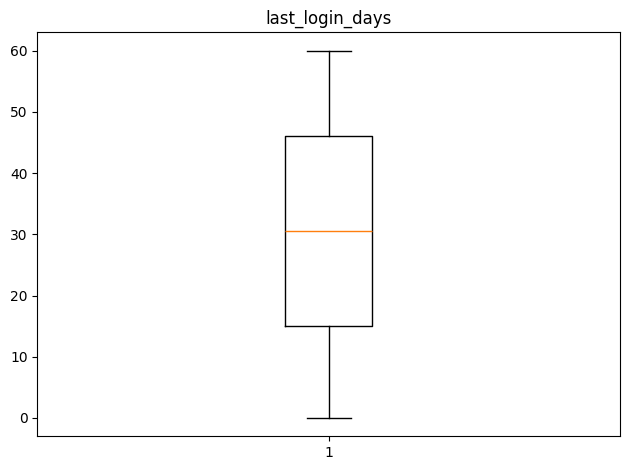

In [18]:
# last_login_days_train의 boxplot
plt.boxplot(last_login_days_train)
plt.title("last_login_days")
plt.tight_layout()
plt.savefig("./images/last_login_days_boxplot")
plt.show()

### featuring 방안
- 0: X == 0
- 1: 0 < X < 15
- 2: 15 <= X < 30
- 3: 30 <= X < 45
- 4: X >= 45

In [19]:
# last_login_days featuring
def last_login_days_feature(data):
    result = 4
    if data < 45:
        result = 3
    if data < 30:
        result = 2
    if data < 15:
        result = 1
    if data == 0:
        result = 0

    return result

X_train['last_login_days_feature'] = X_train['last_login_days'].apply(lambda x: last_login_days_feature(x))
X_test['last_login_days_feature'] = X_test['last_login_days'].apply(lambda x: last_login_days_feature(x))
test_df['last_login_days_feature'] = test_df['last_login_days'].apply(lambda x: last_login_days_feature(x))

In [20]:
X_train.shape, X_test.shape, test_df.shape

((2800, 14), (700, 14), (1500, 15))

In [21]:
X_train

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_feature,last_login_days_feature
162,49,Other,Premium,0.21,26,Oceania,TV,17.99,Debit Card,3,0.01,Documentary,0,2
1001,56,Other,Standard,1.95,28,North America,Mobile,13.99,Crypto,4,0.07,Romance,0,2
1718,62,Male,Standard,3.58,15,Oceania,Tablet,13.99,Credit Card,5,0.22,Horror,0,2
1003,52,Female,Basic,20.80,33,Europe,TV,8.99,Credit Card,2,0.61,Romance,2,3
1233,70,Male,Premium,5.62,25,Europe,Desktop,17.99,Credit Card,3,0.22,Comedy,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,Other,Standard,0.68,35,North America,Desktop,13.99,Debit Card,1,0.02,Comedy,0,3
1130,64,Other,Premium,23.36,52,North America,Mobile,17.99,Debit Card,4,0.44,Drama,2,4
1294,32,Female,Basic,8.94,6,North America,Desktop,8.99,Crypto,5,1.28,Action,1,1
860,51,Other,Standard,16.03,48,Africa,Tablet,13.99,Crypto,4,0.33,Romance,1,4
